<a href="https://colab.research.google.com/github/aflah02/RegressionBoilerplateNotebookTensorflow/blob/main/NNRegressionWithTFBoilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from [Learn TensorFlow and Deep Learning fundamentals with Python (code-first introduction) Part 1/2 by Daniel Bourke](https://www.youtube.com/watch?v=tpCFfeUEGs8)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

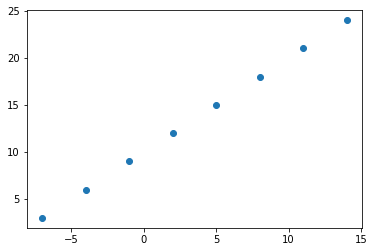

In [3]:
plt.scatter(X, y)

In [4]:
y == 1*X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Shape Analysis

In [5]:
# Demo Tensor for House Prediction Problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

But we want to use one X value to predict one y value hence out inputs won't be all of X

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Why No Shape?
Well Cos It's a Scalar: Rank 0 Tensor

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

Hence our model takes X[0] and outputs y[0] ideally

## Turn Numpy Arrays to Tensor

In [10]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Making Model, Compiling it and fitting it on data

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 467ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


## Testing The Model

In [13]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

Poor Performance but look at the loss it has a mae of roughly 11 and hence we can't expect it to work well 

## Improving the Model

- Altering Architecture
- Change Compile Parameters
- Change fit runs or increase data

Trying 100 Epochs

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 282ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0

In [15]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

Trying Adam Optimizer

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 312ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0548 - mae: 11.0548
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6048 - mae: 10.6048
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1548 - mae: 10.1548
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7048 - mae: 9.7048
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2548 - mae: 9.2548
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8048 - mae: 8.8048
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3548 - mae: 8.3548
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9048 - mae: 7.9048
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4548 - mae: 7.4548
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0048 -

In [17]:
model.predict([17.0])

array([[27.401554]], dtype=float32)

Trying Extra Layers

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 13ms

In [19]:
model.predict([17.0])

array([[31.38265]], dtype=float32)

This model seems to be doing worse even when our loss is lower
OVERFITTING!!!

Trying to tweak hidden neurons

In [20]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 11.9988 - mae: 11.9988
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4313 - mae: 11.4313
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8595 - mae: 10.8595
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2791 - mae: 10.2791
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6752 - mae: 9.6752
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0413 - mae: 9.0413
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3721 - mae: 8.3721
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6559 - mae: 7.6559
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8994 - mae: 6.8994
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.0954 - mae: 6.0954
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [21]:
model.predict([17.0])

array([[31.323973]], dtype=float32)

Trying to tweak activation

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 609ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7017 - mae: 12.7017
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2185 - mae: 12.2185
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7299 - mae: 11.7299
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2333 - mae: 11.2333
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7262 - mae: 10.7262
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2060 - mae: 10.2060
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6700 - mae: 9.6700
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1155 - mae: 9.1155
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5396 - mae: 8.5396
Epoch 11/100
1/1 [==============================] - 0s 

In [23]:
model.predict([17.0])

array([[29.787045]], dtype=float32)

Trying to tweak optimizer

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 695ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.1147 - mae: 13.1147
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0473 - mae: 13.0473
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9799 - mae: 12.9799
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9125 - mae: 12.9125
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8450 - mae: 12.8450
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7774 - mae: 12.7774
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 12.7098 - mae: 12.7098
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6422 - mae: 12.6422
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5745 - mae: 12.5745
Epoch 11/100
1/1 [==============================] -

In [25]:
model.predict([17.0])

array([[32.05097]], dtype=float32)

Trying to tweak optimizer's LR

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 846ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - los

In [27]:
model.predict([17.0])

array([[27.216782]], dtype=float32)

We're Pretty Close as Our Original Relation was y = X + 10

## Visualize
- The data
- The Model
- Training 
- Predictions

Making a bigger dataset

In [28]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Visualize the Data

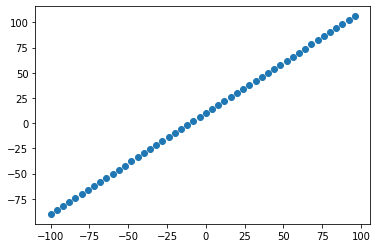

In [30]:
plt.scatter(X, y)

3 Sets
- Training
- Validation
- Testing

Here we'll make only 2 Training, Testing

In [31]:
X_train = X[:40] # 80% of 50
y_train = y[:40]
X_test = X[40:] # Last 20% of 50
y_test = y[40:]

In [32]:
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

Visualize Training and Testing

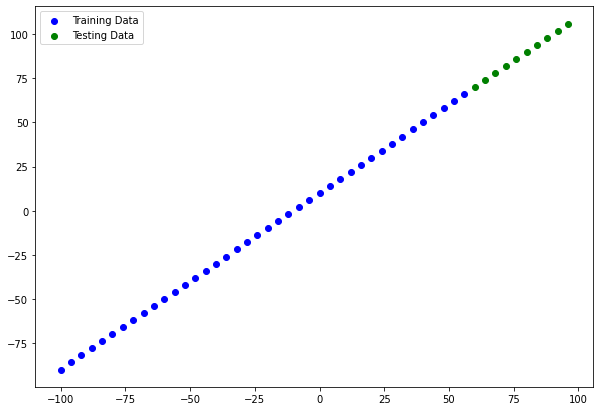

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

Model

In [34]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1,)), # Prevents Error if you try .summary() before fitting or building
    tf.keras.layers.Dense(10, name="input_layer", input_shape=[1]),
    tf.keras.layers.Dense(1, name="output_layer"),
],     name="Model")

model.compile(loss = tf.keras.losses.mae,
              optimizer = "sgd",
              metrics=["mae"])

Visualize the Model

In [35]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- Total Parameters: Total Parameters in Model
- Trainable ones are learnt
- Other ones aren't (Typically pop up in Transfer Learning)

In [36]:
model.fit(X_train, y_train, epochs=100, verbose=0)

Visualize Model

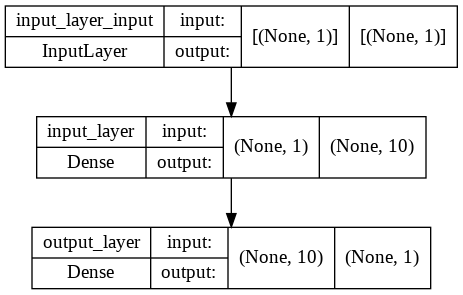

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Visualize Model Predictions

In [38]:
y_pred = model.predict(X_test)

In [78]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Model Predictions")
  plt.legend()

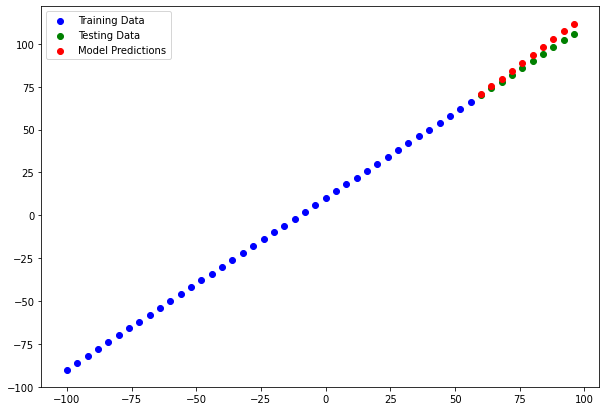

In [79]:
plot_preds(X_train, y_train, X_test, y_test, y_pred)

Evaluate Model

In [41]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 335ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [42]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [43]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [60]:
def mae(y_truth, y_pred):
  return tf.metrics.mean_absolute_error(y_truth, y_pred)

def mse(y_truth, y_pred):
  return tf.metrics.mean_squared_error(y_truth, y_pred)
  

## 3 Modelling Experiments
- Same as original, but 100 epochs
- 2 Layers, 100 epochs
- 2 Layers, 500 epochs

Model 1

In [91]:
tf.random.set_seed(42)

Model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
],     name="Model_1")

Model_1.compile(loss = tf.keras.losses.mae,
              optimizer = "sgd",
              metrics=["mae"])

Model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

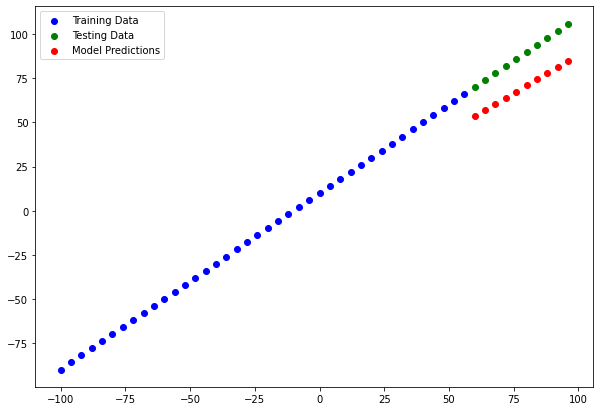

In [92]:
y_pred1 = Model_1.predict(X_test)
plot_preds(predictions = y_pred1)

In [93]:
mae1 = mae(y_test, tf.squeeze(Model_1.predict(X_test)))

In [94]:
mse1 = mse(y_test, tf.squeeze(Model_1.predict(X_test)))

In [110]:
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

Model 2

In [95]:
tf.random.set_seed(42)

Model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

Model_2.compile(loss = tf.keras.losses.mae,
              optimizer = "sgd",
              metrics=["mae"])

Model_2.fit(X_train, y_train, epochs=100, verbose=0)

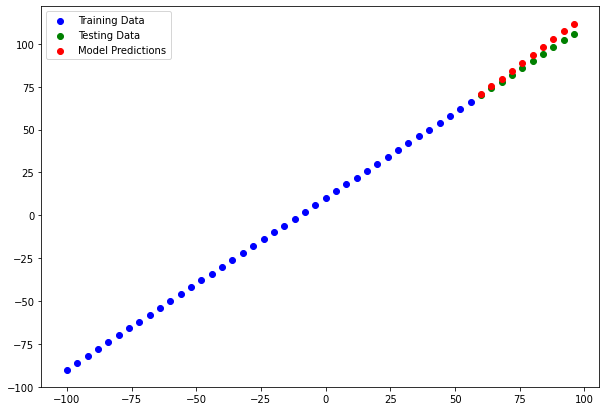

In [96]:
plot_preds(predictions = Model_2.predict(X_test))

In [97]:
mae2 = mae(y_test, tf.squeeze(Model_2.predict(X_test)))

In [98]:
mse2 = mse(y_test, tf.squeeze(Model_2.predict(X_test)))

In [109]:
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

Model 3

In [99]:
tf.random.set_seed(42)

Model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

Model_3.compile(loss = tf.keras.losses.mae,
              optimizer = "sgd",
              metrics=["mae"])

Model_3.fit(X_train, y_train, epochs=500, verbose=0)

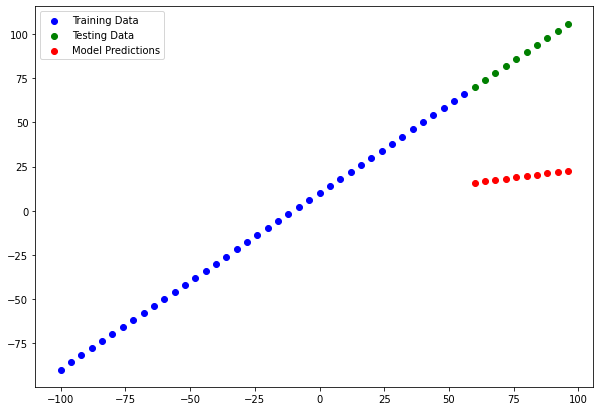

In [100]:
plot_preds(predictions = Model_3.predict(X_test))

In [106]:
mae3 = mae(y_test, tf.squeeze(Model_3.predict(X_test)))

In [107]:
mse3 = mse(y_test, tf.squeeze(Model_3.predict(X_test)))

In [108]:
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

Overfitting 👆

## Comparing Runs

In [115]:
import pandas as pd
model_results = [["Model_1", mae1.numpy(), mse1.numpy()],
                 ["Model_2", mae2.numpy(), mse2.numpy()],
                 ["Model_3", mae3.numpy(), mse3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])

In [116]:
all_results

,model,mae,mse
0,Model_1,18.745327,353.573364
1,Model_2,3.196941,13.070143
2,Model_3,68.713615,4808.027344


In [117]:
Model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Saving Our Model

- SavedModel Format
- HDF5 Format

In [118]:
Model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [119]:
Model_2.save("best_model_HDF5_format.h5")

## Loading a Model

In [120]:
load_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")

In [121]:
load_SavedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [122]:
Model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [124]:
Model_2_preds = Model_2.predict(X_test)
load_SavedModel_format_preds = load_SavedModel_format(X_test)
Model_2_preds == load_SavedModel_format_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [125]:
load_h5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [126]:
load_h5_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [127]:
Model_2_preds = Model_2.predict(X_test)
load_h5_format_preds = load_h5_format(X_test)
Model_2_preds == load_h5_format_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>